In [1]:
import numpy as np

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0,0,0,1]]).T

In [3]:
X.shape, Y.shape

((4, 2), (4, 1))

In [4]:
def sigmoid(Z):  #Z = bias + wt* feature
    return 1 / (1+np.exp(-Z))

In [5]:
def derivativeSig(z):
    return sigmoid(z)*(1- sigmoid(z))

In [6]:
# no hidden layer weights
wts = 2 * np.random.random((2,1)) - 1
bias = 2 * np.random.random(1) - 1
wts, bias

(array([[-0.26151217],
        [ 0.01950678]]),
 array([0.8133703]))

In [7]:
#forward progation without any hidden layer
output0 = X
output = sigmoid(np.dot(output0, wts)+bias)
output

array([[0.69282723],
       [0.69696293],
       [0.63456658],
       [0.63907806]])

In [8]:
output.shape

(4, 1)

In [9]:
import matplotlib.pyplot as plt

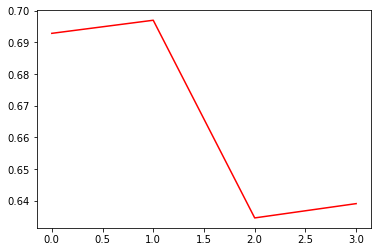

In [10]:
plt.plot(output[:,0], color = 'r')
plt.show()

In [11]:
wh = 2 * np.random.random((2,2)) - 1
bh = 2 * np.random.random((1,2)) - 1
wo = 2 * np.random.random((2,1)) - 1 
bo = 2 * np.random.random((1,1)) - 1

In [12]:
# Forward propagation with one hidden layer
output0 = X
outputHidden = sigmoid(np.dot(output0, wh)+bh)
output = sigmoid(np.dot(outputHidden, wo) + bo)
output

array([[0.56121685],
       [0.56821104],
       [0.5691983 ],
       [0.57552193]])

------------------------------------------------------------
### Neural Ntw without any hidden network

In [13]:
# no hiddent layer weigths
weights = 2 * np.random.random((2,1)) - 1
bias = 2 * np.random.random(1) - 1
lr = 0.1
wts, bias

(array([[-0.26151217],
        [ 0.01950678]]),
 array([0.24733586]))

In [14]:
for iter in range(1000):
    output0 = X
    output = sigmoid(np.dot(output0, weights) + bias)
    first_term = output - Y
    input_for_last_layer = np.dot(output0, weights)  + bias
    second_term = derivativeSig(input_for_last_layer)
    first_two = first_term * second_term
 
    changes = np.array([[0,0],[0,0]])

    for i in range(2):
        for j in range(4):
            changes[i][0] += first_two[j][0] * output0[j][i]
    wts = wts - lr*changes
    bias_change = 0.0 
    for j in range(4):
        bias_change += first_two[j][0] * 1
    bias = bias - lr * bias_change
output = sigmoid(np.dot(X, wts) + bias)

wts

array([[-0.26151217, -0.26151217],
       [ 0.01950678,  0.01950678]])

In [15]:
bias

array([-1.25569501])

In [16]:
output

array([[0.22171586, 0.22171586],
       [0.22510018, 0.22510018],
       [0.17987314, 0.17987314],
       [0.18276875, 0.18276875]])

###  Improvement using Vectorization

In [17]:
for iter in range(1000):
    output0 = X
    output = sigmoid(np.dot(output0, weights) + bias)
    first_term = output - Y
    input_for_last_layer = np.dot(output0, weights)  + bias
    second_term = derivativeSig(input_for_last_layer)
    first_two = first_term * second_term
    changes = np.dot(output0.T, first_two)
    
    for i in range(2):
        for j in range(4):
            changes[i][0] += first_two[j][0] * output0[j][i]
    wts = wts - lr*changes
    bias_change = 0.0 
    for j in range(4):
        bias_change = np.sum(first_two)
    bias = bias - lr * bias_change
output = sigmoid(np.dot(X, wts) + bias)

wts, bias, output

(array([[ 9.90941075,  9.90941075],
        [22.90489347, 22.90489347]]),
 array([-1.25574929]),
 array([[0.2217065 , 0.2217065 ],
        [1.        , 1.        ],
        [0.99982554, 0.99982554],
        [1.        , 1.        ]]))